<a href="https://colab.research.google.com/github/MarcoAPe/Data_Science_Projects/blob/main/Proyecto_M2_Limpieza_y_preprocesado_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto Módulo 2 Limpieza y preprocesado de datos

## Introducción

En la vida laboral de un científico de datos, la tarea más importante es realizar un buen análisis. Sin un entendimiento del problema, resultará difícil aplicar un buen modelo para su resolución. Por ello, ahora que comprendiste las técnicas revisadas a lo largo de este módulo, serás capaz de aplicar el tratamiento necesario de un conjunto de datos para su explotación.

## Demo

Este documento te servirá como inspiración para crear el tuyo: https://drive.google.com/file/d/1LKiMVyepbdTBK_Fs_9e6-y2ybB0Kem-Y/view?usp=sharing

## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Criterios de evaluación

* Análisis Exploratorio: Calidad del análisis, entendimiento de las variables y estudio de las correlaciones con el objetivo. (25pts)
  - Excelente: Comprende la multicolinealidad entre las variables y señala gráficamente los valores atípicos en las distribuciones.
  - Suficiente: Comprende la relevancia de las variables e identifica las variables más significativas y cuales tienen mayor relación con el objetivo.

*   Limpieza de datos: Eliminación de faltantes, duplicados y atípicos de manera correcta, eligiendo el mejor modo para imputar valores faltantes. (25pts)

  - Excelente: Elimina los valores atí­picos y los imputa eligiendo el mejor modo para imputar valores faltantes.
  - Suficiente: Elimina las variables que no cumplen con el criterio de completitud y se imputan los valores restantes sin justificar o comprar el método de imputación.


*   Procesamiento de datos: Correcto uso de transformadores, justificando el porque se eligió uno sobre algún otro. (25pts)

  - Excelente: Transforma las variables de acuerdo a su naturaleza utilizando distintos métodos para escalar dependiendo de los valores de cada variable.
  - Transforma las variables categóricas y variables continuas.

*   Reducción de dimensiones: Selección de la mejor técnica para reducir las dimensiones, además de justificar el porque se esta reduciendo a cierto número sobre cualquier otro. (25pts)

  - Excelente: Elige el óptimo número de dimensiones de acuerdo a varias técnicas, justificando el porque se eligió el número de dimensiones final.
  - Suficiente: Reduce el conjunto de datos propuesto para una correcta reducción de nuestro set de datos.


## Objetivos

El participante:

* Realizará un correcto análisis y tratamiento de datos, el cuál le permita preparar y limpiar los datos de la forma más adecuada para utilizarlos posteriormente en un modelo.
* Comprenderá la relevacia de las variables e identificará las variables más significativas que tienen mayor relación con el objetivo.
* Comprenderá la multicolinealidad entre las variables y señalará gráficamente los valores atípicos en las distribuciones.
* Eliminará valores faltantes, duplicados y atípicos de manera correcta, usando el modo más adecuado para su objetivo.
* Usará de forma adecuada los transformadores utilizando distintos métodos para escalar en función de los valores de cada variable.
* Hará una correcta reducción del set de datos y elegirá el número óptimo de dimensiones mediante diversas técnicas.

¡Es momento de ponerte a prueba y descubrir todo lo que eres capaz!

Comienza por analizar cada uno de los apartados que te solicitamos para este proyecto y trata de usar todas las herramientas que aprendiste a lo largo del módulo. Recuerda que el detalle que pongas en cada proceso será tomado en cuenta en tu evaluación, revisa los criterios en la sección de tareas de Teams.

¡Te desemos éxito!

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [ ]:
#Importa las librerías que vayas a usar para tu proyecto, no olvides importar pandas.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/U-Camp/M2/Proyecto/dataset_Proyecto_M2.csv')
raw

<ipython-input-3-a379999acc4a>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/U-Camp/M2/Proyecto/dataset_Proyecto_M2.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



### Exploratory Data Analysis (EDA)
Se llevará a cabo el análisis por partes.
La secuencia será:
1. Info para ver qué tipo de datos tiene cada columna.
2. Identificar completitud.





#### 1.- Tipo de dato de cada columna

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

#### 2.- Identificar completitud.

In [ ]:
# Definir función Completitud.
def Completeness(df,thold):
  # Crear DataFrame que contenga completitud de todas las columnas
  cness = pd.DataFrame(df.count()/len(df)*100).sort_values(by = 0).reset_index()
  cness.rename(columns = {0:'Completeness[%]','index':'Column'}, inplace = True)

  # Crear DataFrame que contenga completitud de las columnas inferiores al thold
  lowcness = cness[cness['Completeness[%]'] < thold].reset_index().drop('index', axis = 1)

  # Crear DataFrame que contenga completitud de las columnas superiores al thold
  highcness = cness[cness['Completeness[%]'] >= thold].reset_index().drop('index', axis = 1)

  return highcness, lowcness

In [ ]:
highcness, lowcness = Completeness(raw,80)
# DataFrame con completitud adecuada
print(highcness)
# DataFrame con completitud inadecuada
print(lowcness)

                        Column  Completeness[%]
0                 tot_coll_amt        92.080498
1                  tot_cur_bal        92.080498
2             total_rev_hi_lim        92.080498
3                    emp_title        94.200674
4                   emp_length        94.948607
5                 last_pymnt_d        98.009982
6                   revol_util        99.943429
7                        title        99.982871
8   collections_12_mths_ex_med        99.983660
9           last_credit_pull_d        99.994027
10                    open_acc        99.996732
11                     pub_rec        99.996732
12            earliest_cr_line        99.996732
13                   total_acc        99.996732
14                 delinq_2yrs        99.996732
15              acc_now_delinq        99.996732
16              inq_last_6mths        99.996732
17                  annual_inc        99.999549
18            application_type       100.000000
19                 policy_code       100

## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

### Supresión de columnas.
Se sustraerán columnas cuya información no sea relevante:


1.   Eliminar columnas que contengan identificadores (id's).
2.   Editar columnas term, last_pymnt_d, last_credit_pull_d.
3.   Eliminar columnas cuya completitud sea inferior al 80%.



#### 1.- Identificadores.

In [ ]:
raw.drop(columns = ['id','member_id','url','zip_code','policy_code','grade'], inplace = True)
# policy_code se elimina porque tiene un único valor
# Se puede precindir de grade pues su información está subcontenida en sub_grade
raw

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B5,University Medical Group,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,36 months,11.99,332.10,B5,Office Assistant,8 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,24000.0,24000.0,24000.0,36 months,11.99,797.03,B5,Director of Maintenance,10+ years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,13000.0,13000.0,13000.0,60 months,15.99,316.07,D2,Radiologist Technologist,5 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,12000.0,12000.0,12000.0,60 months,19.99,317.86,E3,Painter,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


#### 2.- Edit de columnas.

In [ ]:
# str a float
raw.term = raw.term.str.replace('months','').str.replace('month','').astype(float)
# str a datetime
raw['last_pymnt_d'] = pd.to_datetime(raw['last_pymnt_d'].str.replace('Jan','01').str.replace('Feb','02').str.replace('Mar','03').str.replace('Apr','04').str.replace('May','05').str.replace('Jun','06').str.replace('Jul','07').str.replace('Aug','08').str.replace('Sep','09').str.replace('Oct','10').str.replace('Nov','11').str.replace('Dec','12'), format = '%m-%Y')
# str a datetime
raw['last_credit_pull_d'] = pd.to_datetime(raw['last_credit_pull_d'].str.replace('Jan','01').str.replace('Feb','02').str.replace('Mar','03').str.replace('Apr','04').str.replace('May','05').str.replace('Jun','06').str.replace('Jul','07').str.replace('Aug','08').str.replace('Sep','09').str.replace('Oct','10').str.replace('Nov','11').str.replace('Dec','12'), format = '%m-%Y')
# str a float
raw['emp_length'] = raw['emp_length'].str.replace('+','').str.replace('<','').str.replace('>','').str.replace('years','').str.replace('year','').astype(float)
# str a datetime
raw['earliest_cr_line'] = pd.to_datetime(raw['earliest_cr_line'].str.replace('Jan','01').str.replace('Feb','02').str.replace('Mar','03').str.replace('Apr','04').str.replace('May','05').str.replace('Jun','06').str.replace('Jul','07').str.replace('Aug','08').str.replace('Sep','09').str.replace('Oct','10').str.replace('Nov','11').str.replace('Dec','12'), format = '%m-%Y')
# str a datetime
raw['issue_d'] = pd.to_datetime(raw['issue_d'].str.replace('Jan','01').str.replace('Feb','02').str.replace('Mar','03').str.replace('Apr','04').str.replace('May','05').str.replace('Jun','06').str.replace('Jul','07').str.replace('Aug','08').str.replace('Sep','09').str.replace('Oct','10').str.replace('Nov','11').str.replace('Dec','12'), format = '%m-%Y')

<ipython-input-8-87a454bf9e45>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw['emp_length'] = raw['emp_length'].str.replace('+','').str.replace('<','').str.replace('>','').str.replace('years','').str.replace('year','').astype(float)


#### 3.- Completitud < 80%

In [ ]:
# Definir función Completitud (expandida)
def CompletenessDrop(df,thold):
  # Crear DataFrame que contenga completitud de todas las columnas
  cness = pd.DataFrame(df.count()/len(df)*100).sort_values(by = 0).reset_index()
  cness.rename(columns = {0:'Completeness[%]','index':'Column'}, inplace = True)

  # Crear DataFrame que contenga completitud de las columnas inferiores al thold
  lowcness = cness[cness['Completeness[%]'] < thold].reset_index().drop('index', axis = 1)

  # Crear DataFrame que contenga completitud de las columnas superiores al thold
  highcness = cness[cness['Completeness[%]'] >= thold].reset_index().drop('index', axis = 1)

  # Crear DataFrame que contenga sólo las columnas con completitud >= thold
  df_Complete = df.drop(columns = lowcness.Column.values)

  # Crear DataFrame que contenga sólo las columnas con completitud < thold
  df_Incomplete = df.drop(columns = highcness.Column.values)
  return df_Complete, df_Incomplete, highcness, lowcness

In [ ]:
df, *_ = CompletenessDrop(raw,80)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B2,NaN,10.0,RENT,...,0.00,2015-01-01,171.62,2016-01-01,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C4,Ryder,1.0,RENT,...,1.11,2013-04-01,119.66,2013-09-01,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C5,NaN,10.0,RENT,...,0.00,2014-06-01,649.91,2016-01-01,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C1,AIR RESOURCES BOARD,10.0,RENT,...,0.00,2015-01-01,357.48,2015-01-01,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,B5,University Medical Group,1.0,RENT,...,0.00,2016-01-01,67.79,2016-01-01,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,10000.0,10000.0,36.0,11.99,332.10,B5,Office Assistant,8.0,RENT,...,0.00,2016-01-01,332.10,2016-01-01,0.0,INDIVIDUAL,0.0,0.0,25274.0,17100.0
887375,24000.0,24000.0,24000.0,36.0,11.99,797.03,B5,Director of Maintenance,10.0,MORTGAGE,...,0.00,2016-01-01,797.03,2016-01-01,0.0,INDIVIDUAL,0.0,0.0,140285.0,10200.0
887376,13000.0,13000.0,13000.0,60.0,15.99,316.07,D2,Radiologist Technologist,5.0,RENT,...,0.00,2016-01-01,316.07,2016-01-01,0.0,INDIVIDUAL,0.0,0.0,34178.0,18000.0
887377,12000.0,12000.0,12000.0,60.0,19.99,317.86,E3,Painter,1.0,RENT,...,0.00,2016-01-01,317.86,2016-01-01,1.0,INDIVIDUAL,0.0,0.0,58418.0,27000.0


In [ ]:
# Verificar que el DataFrame contiene sólo columnas con completitud adecuada
highcness, lowcness = Completeness(df,80)
lowcness

,Column,Completeness[%]


### Imputación y ajuste de valores.
Se llevará la completitud al 100% según el tipo de valor de la columna y se verificará la importancia de los outliers.

1. Imputación.
2. Tratamiento de outliers.

#### 1.- Imputación de datos.

In [ ]:
def Imputer(df,criterion):
  for key in list(criterion.keys()):
    if criterion.get(key) == 'mean':
      df[key].fillna(value = df[key].mean(), inplace = True)
    elif criterion.get(key) == 'mode':
      df[key].fillna(value = df[key].mode()[0], inplace = True)
    elif criterion.get(key) == 'median':
      df[key].fillna(value = df[key].median(), inplace = True)
    elif criterion.get(key) == 'No':
      df[key].fillna(value = 'No', inplace = True)
      df = df[df[key] != 'No']
    df.reset_index(drop = True, inplace = True)
  return df

In [ ]:
cols = list(df.columns)
criterion = {'loan_amnt':'mean',
 'funded_amnt':'mean',
 'funded_amnt_inv':'mean',
 'term':'mode',
 'int_rate':'mode',
 'installment':'median',
 'sub_grade':'mode',
 'emp_title':'mode',
 'emp_length':'mode',
 'home_ownership':'mode',
 'annual_inc':'median',
 'verification_status':'mode',
 'issue_d':'mode',
 'loan_status':'mode',
 'pymnt_plan':'mode',
 'purpose':'mode',
 'title':'mode',
 'addr_state':'mode',
 'dti':'No',
 'delinq_2yrs':'No',
 'earliest_cr_line':'mode',
 'inq_last_6mths':'median',
 'open_acc':'median',
 'pub_rec':'No',
 'revol_bal':'median',
 'revol_util':'No',
 'total_acc':'median',
 'initial_list_status':'mode',
 'out_prncp':'No',
 'out_prncp_inv':'No',
 'total_pymnt':'median',
 'total_pymnt_inv':'median',
 'total_rec_prncp':'median',
 'total_rec_int':'median',
 'total_rec_late_fee':'median',
 'recoveries':'median',
 'collection_recovery_fee':'median',
 'last_pymnt_d':'No',
 'last_pymnt_amnt':'median',
 'last_credit_pull_d':'mode',
 'collections_12_mths_ex_med':'mode',
 'application_type':'mode',
 'acc_now_delinq':'No',
 'tot_coll_amt':'No',
 'tot_cur_bal':'No',
 'total_rev_hi_lim':'median'}

 # Todas las columnas cuyo método es 'None' es aquellos atributos que no se pueden inferir pues afectan directamente al consumidor o bien suponer sería incorrecto.
 # Ejemplos de esto son:
 #    'delinq2yr' que son los pagos no realizados a tiempo en el último par de años
 #    'tot_call_amt' que es la cantidad total de adeudo en cuentas del prestatario.
 #    'acc_now_delinq' que es la cantidad de cuentas en donde el prestatario tiene deudas.
 #
 #     El significado de todas estas variables las saqué con ChatGPT y en este link: https://wiki.datrics.ai/more-features

In [ ]:
df = Imputer(df,criterion)

In [ ]:
highcness, lowcness = Completeness(df,80)
# DataFrame con completitud adecuada
print(highcness)
# DataFrame con completitud inadecuada
print(lowcness)

                        Column  Completeness[%]
0                    loan_amnt            100.0
1                   revol_util            100.0
2                    total_acc            100.0
3          initial_list_status            100.0
4                    out_prncp            100.0
5                out_prncp_inv            100.0
6                  total_pymnt            100.0
7              total_pymnt_inv            100.0
8              total_rec_prncp            100.0
9                total_rec_int            100.0
10          total_rec_late_fee            100.0
11                  recoveries            100.0
12     collection_recovery_fee            100.0
13                last_pymnt_d            100.0
14             last_pymnt_amnt            100.0
15          last_credit_pull_d            100.0
16  collections_12_mths_ex_med            100.0
17            application_type            100.0
18              acc_now_delinq            100.0
19                tot_coll_amt          

#### 2.- Tratamiento de outliers

In [ ]:
def Boxplot(df):
  num_Val = df.select_dtypes(include = ['float64', 'int64'])
  rws = int(round(df.shape[1]/3,0))
  plt.figure(figsize = (15,rws*8))
  i = 1
  plt.subplot(rws,3,i)
  for col in num_Val.columns.values:
    plt.subplot(rws,3,i)
    sns.boxplot(data = num_Val, x = col, color = 'cyan')
    plt.title(col)
    plt.xlabel('Cantidad')
    plt.xticks(rotation = 90)
    i += 1

    Q1 = num_Val[col].quantile(0.25)
    Q3 = num_Val[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (num_Val[col] < lower_bound) | (num_Val[col] > upper_bound)
    num_outliers = outliers.sum()

    # Agregar leyenda con cantidad de outliers
    plt.text(0.5, 0.95, f'Outliers: {num_outliers}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    if 1.1*num_Val[col].mode()[0] != num_Val[col].mean()/1.1 or num_Val[col].mode()[0]/1.1 != 1.1*num_Val[col].mean():
      plt.axvline(x = num_Val[col].mode()[0], color = 'm', linestyle='dashed', linewidth = 1)
      plt.axvline(x = num_Val[col].mean(), color = 'g', linestyle='dashed', linewidth = 1)


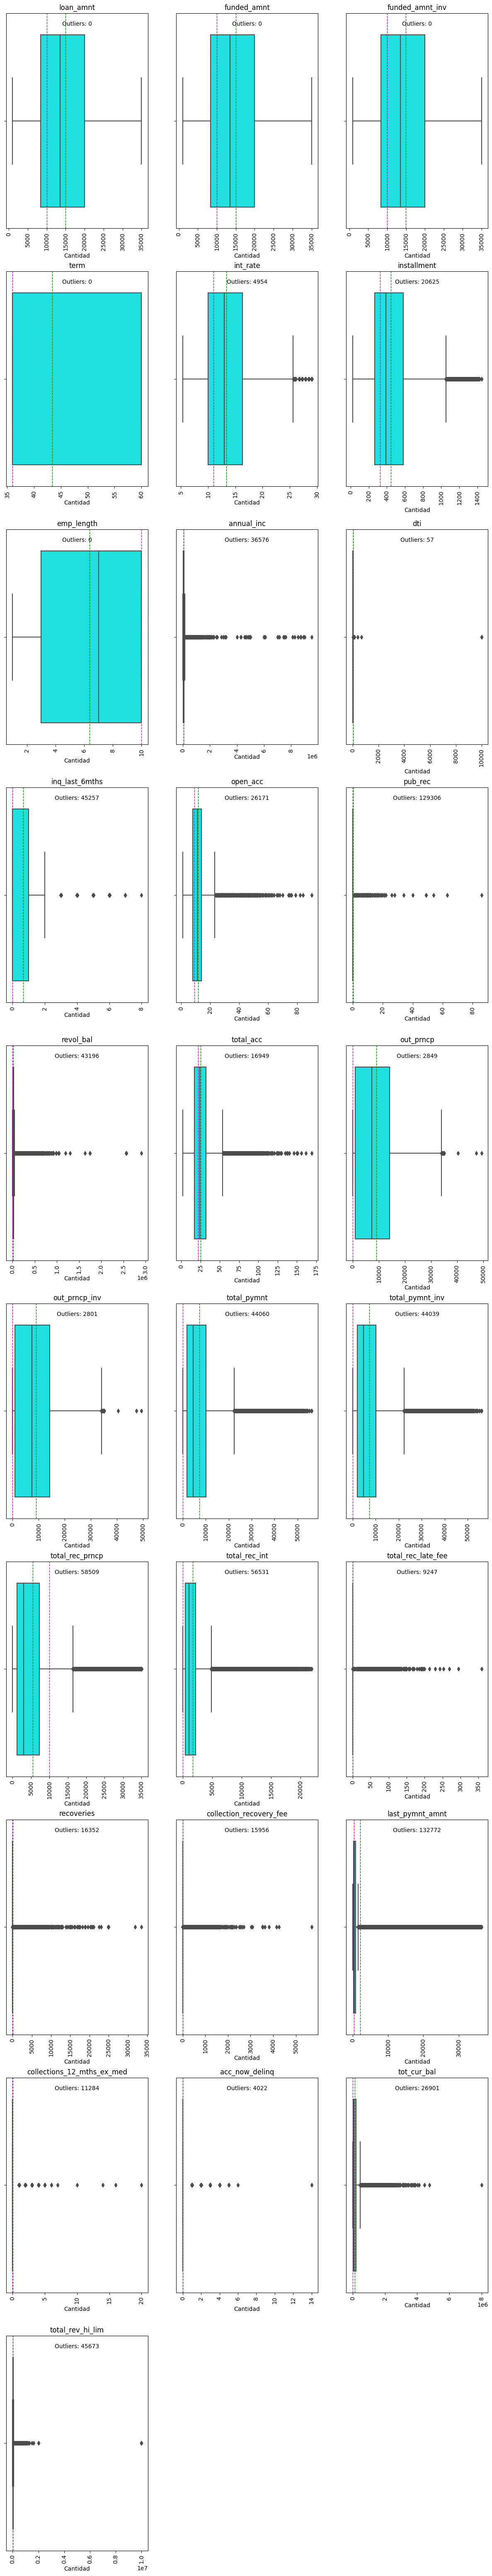

In [ ]:
Boxplot(df)

In [ ]:
def Outliers(df,criterion = None):
  import numpy as np
  if criterion == None:
    num_Val = df.select_dtypes(include = ['float64', 'int64'])
  else:
    num_Val = criterion
  for col in num_Val:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      low_bnd = Q1 - 1.5 * IQR
      up_bnd = Q3 + 1.5 * IQR
      df[col] = np.clip(df[col], low_bnd, up_bnd)
  return df

In [ ]:
# Para el ajuste de outliers se usará el siguiente criterio:

# int_rate, installment, total_pymnt, total_rec_fee, recoveries, información inherente al tipo de préstamo...
# last_pymnt_amnt, acc_now_delinq, tot_cur_bal, ofrece información sobre el tipo de cliente en relación al tipo de préstamo...
# ... entre otras; son variables que imputándose alterarían la naturaleza del comportamiento que afecta al tipo de préstamo.

# dti, inq_last_6_months, revol_bal, total_acc, collections_12_mths_ex_med, etc sí se trataran para outliers.

In [ ]:
criterion = ['term',
'dti',
'revol_bal',
'annual_inc',
'delinq_2yrs',
'inq_last_6mths',
'open_acc',
'total_acc',
'last_credit_pull_d',
'collections_12_mths_ex_med',
'total_rev_hi_lim']
df = Outliers(df,criterion)

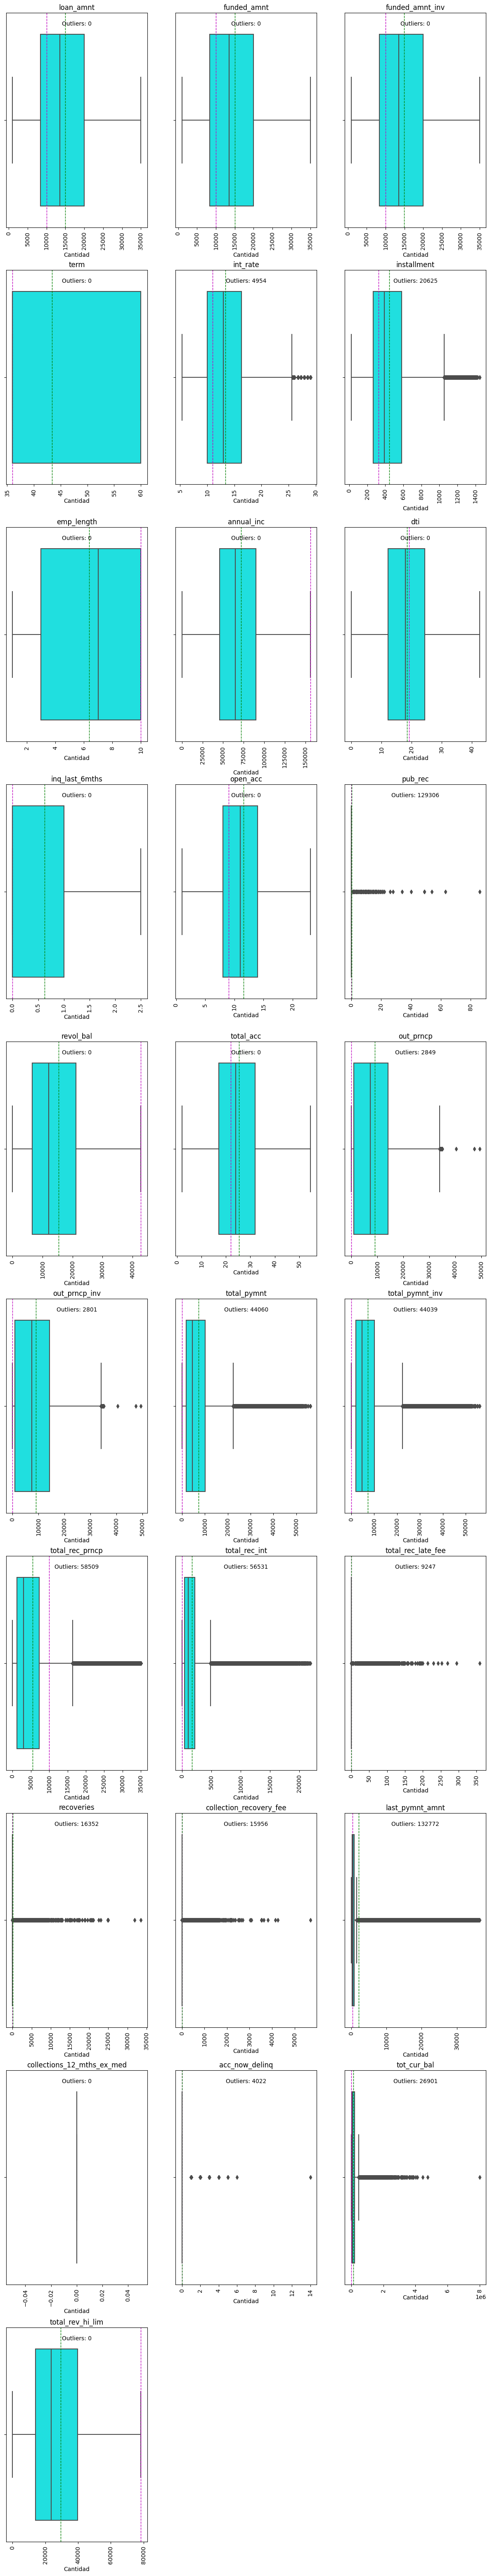

In [ ]:
Boxplot(df)
# Aquí noté que algunas de mis variables perdieron valor :( pero no sé por qué, por ejemplo collections_12_mths_ex_med de tener distintos valores
# posibles ahora sólo uno.


## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

### Tratamiento de variables categóricas.

1. Labeling.
2. Dummies use.


#### 1.- Labeling de variables dicotómicas

In [ ]:
def Labels(df,columnas):
  from sklearn.preprocessing import LabelEncoder
  for col in columnas:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
  return df

In [ ]:
LabelCol = ['verification_status','pymnt_plan','initial_list_status','application_type'] # Filtrar por valor único (<=2)
DummiesCol = ['home_ownership','verification_status','loan_status','pymnt_plan']

In [ ]:
df = Labels(df,LabelCol)

#### 2.- Dummies use.

In [ ]:
def Dummies(df,columns):
   return pd.get_dummies(df, columns=columns, drop_first=False)

In [ ]:
df.drop(['title','emp_title','addr_state','revol_util','issue_d','last_pymnt_d','earliest_cr_line','purpose','sub_grade','last_credit_pull_d','earliest_cr_line','issue_d','delinq_2yrs','tot_coll_amt'], axis = 1, inplace = True)

In [ ]:
# Tuve que eliminar muchas variables categóricas aunque sí las considerara importantes porque el compilador no dejaba de crashear por falta de RAM

# "Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out"

In [ ]:
df = Dummies(df,DummiesCol)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,...,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Issued,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_0,pymnt_plan_1
0,27050.0,27050.0,27050.0,36.0,10.99,885.46,10.0,55000.0,22.87,0.0,...,0,1,0,0,0,0,0,0,1,0
1,9750.0,9750.0,9750.0,36.0,13.98,333.14,1.0,26000.0,25.12,0.0,...,0,1,0,0,0,0,0,0,1,0
2,12000.0,12000.0,12000.0,36.0,6.62,368.45,10.0,105000.0,14.05,1.0,...,0,1,0,0,0,0,0,0,1,0
3,12000.0,12000.0,12000.0,36.0,13.53,407.40,10.0,40000.0,16.94,0.0,...,0,0,0,1,0,0,0,0,1,0
4,15000.0,15000.0,15000.0,36.0,8.90,476.30,2.0,63000.0,16.51,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799182,10000.0,10000.0,10000.0,36.0,11.99,332.10,8.0,31000.0,28.69,0.0,...,0,1,0,0,0,0,0,0,1,0
799183,24000.0,24000.0,24000.0,36.0,11.99,797.03,10.0,79000.0,3.90,1.0,...,0,1,0,0,0,0,0,0,1,0
799184,13000.0,13000.0,13000.0,60.0,15.99,316.07,5.0,35000.0,30.90,0.0,...,0,1,0,0,0,0,0,0,1,0
799185,12000.0,12000.0,12000.0,60.0,19.99,317.86,1.0,64400.0,27.19,2.0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799187 entries, 0 to 799186
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       799187 non-null  float64
 1   funded_amnt                     799187 non-null  float64
 2   funded_amnt_inv                 799187 non-null  float64
 3   term                            799187 non-null  float64
 4   int_rate                        799187 non-null  float64
 5   installment                     799187 non-null  float64
 6   emp_length                      799187 non-null  float64
 7   annual_inc                      799187 non-null  float64
 8   dti                             799187 non-null  float64
 9   inq_last_6mths                  799187 non-null  float64
 10  open_acc                        799187 non-null  float64
 11  pub_rec                         799187 non-null  float64
 12  revol_bal       

### Escalamiento de variables

In [ ]:
def Scaler(df, criterion, method):
  from sklearn.preprocessing import StandardScaler
  from sklearn.preprocessing import MinMaxScaler
  if method == 'Std':
    scaler = StandardScaler()
  elif method == 'MinMax':
    scaler =MinMaxScaler()
  df[list(criterion.columns)] = scaler.fit_transform(criterion)
  return df

In [ ]:
num_Val = df.select_dtypes(include = ['float64', 'int64'])
Non_num_Val = df.select_dtypes(exclude = ['float64', 'int64'])

In [ ]:
df = Scaler(df,num_Val,'MinMax')
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,...,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Issued,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_0,pymnt_plan_1
0,0.766176,0.766176,0.766862,0.0,0.239544,0.606244,1.000000,0.352564,0.537107,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0.257353,0.257353,0.259531,0.0,0.365864,0.217888,0.000000,0.166667,0.589948,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0.323529,0.323529,0.325513,0.0,0.054922,0.242716,1.000000,0.673077,0.329967,0.4,...,0,1,0,0,0,0,0,0,1,0
3,0.323529,0.323529,0.325513,0.0,0.346853,0.270103,1.000000,0.256410,0.397839,0.0,...,0,0,0,1,0,0,0,0,1,0
4,0.411765,0.411765,0.413490,0.0,0.151246,0.318549,0.111111,0.403846,0.387741,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799182,0.264706,0.264706,0.266862,0.0,0.281791,0.217157,0.777778,0.198718,0.673791,0.0,...,0,1,0,0,0,0,0,0,1,0
799183,0.676471,0.676471,0.677419,0.0,0.281791,0.544066,1.000000,0.506410,0.091592,0.4,...,0,1,0,0,0,0,0,0,1,0
799184,0.352941,0.352941,0.354839,1.0,0.450782,0.205885,0.444444,0.224359,0.725693,0.0,...,0,1,0,0,0,0,0,0,1,0
799185,0.323529,0.323529,0.325513,1.0,0.619772,0.207144,0.000000,0.412821,0.638563,0.8,...,0,1,0,0,0,0,0,0,1,0


## Parte 4

Selecciona la mejor técnica para reducir las dimensiones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

> Recuerda incluir en tu análisis los gráficos adecuados para comunicar lo que deseas expresar. Para favorecer tu entendimiento del programa, se sugiere el uso de comentarios (#) en cada bloque de código.



In [ ]:
def PCA_Red(df, percentage):
  from sklearn.decomposition import PCA
  pca = PCA().fit(df)
  aux = 0
  n = 0
  while aux < percentage:
    aux = aux + pca.explained_variance_ratio_[n]
    n += 1
  pca = PCA(n_components = n).fit(df)
  plt.figure(figsize=(15,8))
  plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(), marker = 'o')
  plt.title('Varianza explicada por número de componentes')
  plt.xlabel('Número de componentes')
  plt.ylabel('Varianza explicada por número de componentes')
  plt.show()
  return n, pca.transform(df)

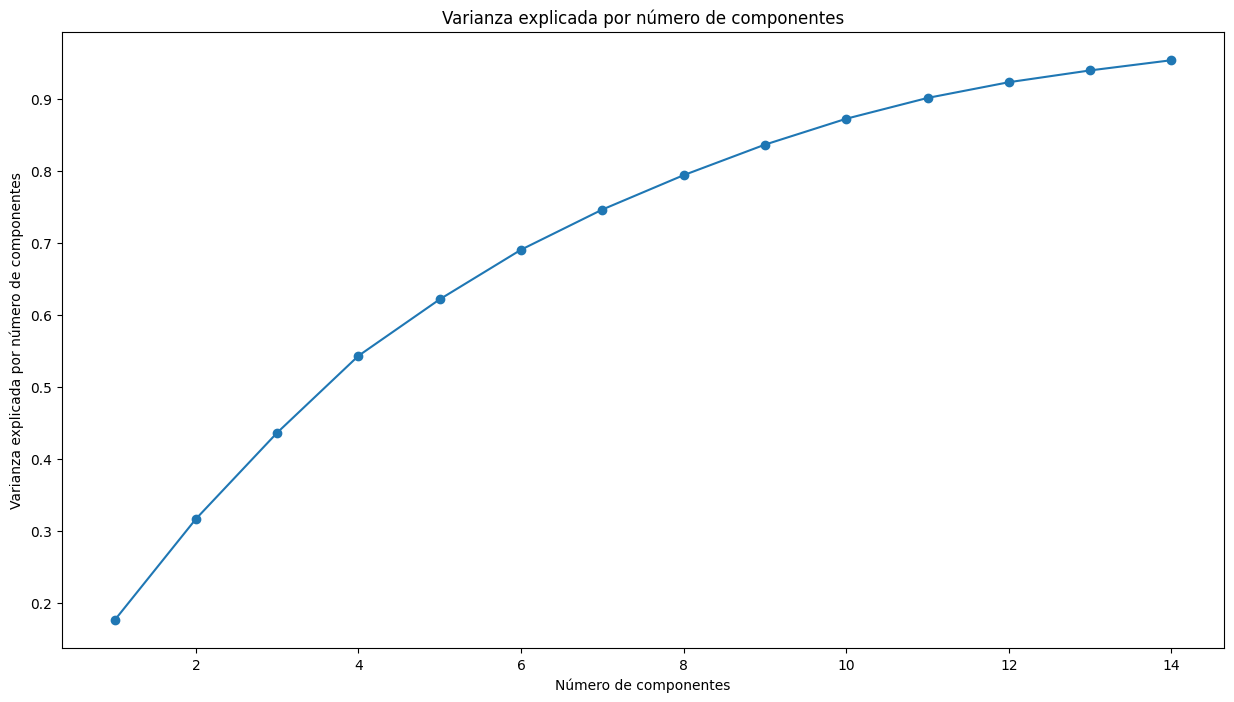

(14,
 array([[ 0.60557498, -0.03497067,  0.56463652, ...,  0.0042993 ,
         -0.03176484, -0.34271514],
        [-1.19068971, -0.01591114, -0.26994898, ..., -0.06997811,
         -0.29632822, -0.19670757],
        [ 0.27362974,  0.15199948, -1.12801025, ..., -0.05612098,
          0.22234307,  0.07407543],
        ...,
        [-0.2847975 , -0.4818289 ,  0.78489751, ..., -0.1092233 ,
         -0.05671764, -0.16224211],
        [-0.42060862, -1.10774182,  0.48133389, ..., -0.168911  ,
          0.00348682, -0.12717427],
        [-0.21702844,  0.03263312,  0.86573082, ..., -0.007626  ,
          0.48765034, -0.01304152]]))

In [ ]:
PCA_Red(df,0.95)

In [ ]:
# Se seleccionan 14 componentes dado que son suficientes para explicar la varianza requerida, en lugar de las 49 columnas que se tenían previamente.